<a href="datacamp.com/workspacecompetition" target="_blank">![banner](banner.png)</a>

# Loan Data

Ready to put your coding skills to the test? Join us for our Workspace Competition.  
For more information, visit [datacamp.com/workspacecompetition](https://datacamp.com/workspacecompetition) 

## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
# Load packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

## Load your data

In [2]:
# Load data from the csv file
df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Understand your variables

In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


Now you can start to explore this dataset with the chance to win incredible prices! Can't think of where to start? Try your hand at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.shape

(9578, 14)

In [7]:
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
#calculate Pearson correlation coefficients for all variables in df
df.corr()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
credit_policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int_rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log_annual_inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days_with_cr_line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol_bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol_util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq_last_6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [9]:
df.groupby("purpose")["not_fully_paid"].mean()

purpose
all_other             0.166023
credit_card           0.115689
debt_consolidation    0.152388
educational           0.201166
home_improvement      0.170111
major_purchase        0.112128
small_business        0.277868
Name: not_fully_paid, dtype: float64

In [10]:
def get_unq(df):
    for i in df.columns:
        print(f'{i} - {len(df[i].unique())}')
get_unq(df)

credit_policy - 2
purpose - 7
int_rate - 249
installment - 4788
log_annual_inc - 1987
dti - 2529
fico - 44
days_with_cr_line - 2687
revol_bal - 7869
revol_util - 1035
inq_last_6mths - 28
delinq_2yrs - 11
pub_rec - 6
not_fully_paid - 2


In [11]:
df.data=df.value_counts()

In [12]:
# finding maximum value minimum value of numerical_features
def min_max(df):
    for i in df.columns:
        if df[i].dtypes!='object':
            print(f'{i} -> {sorted(list(df[i]))[0]} to {sorted(list(df[i]))[-1]}')
min_max(df)

credit_policy -> 0 to 1
int_rate -> 0.06 to 0.2164
installment -> 15.67 to 940.14
log_annual_inc -> 7.547501683 to 14.52835448
dti -> 0.0 to 29.96
fico -> 612 to 827
days_with_cr_line -> 178.9583333 to 17639.95833
revol_bal -> 0 to 1207359
revol_util -> 0.0 to 119.0
inq_last_6mths -> 0 to 33
delinq_2yrs -> 0 to 13
pub_rec -> 0 to 5
not_fully_paid -> 0 to 1


Visualizations

Create a histogram of two FICO distributions on top of each other, one for each credit_policy outcome.

Text(0.5, 0, 'FICO')

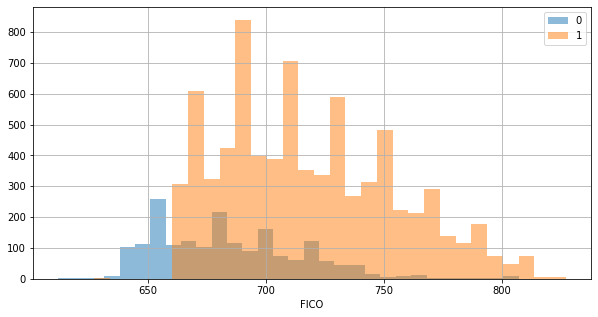

In [13]:
plt.figure(figsize=(10,5))
#Visualizations
df[df['credit_policy']==0]['fico'].hist(bins=30,alpha=0.5,label='0')
df[df['credit_policy']==1]['fico'].hist(bins=30,alpha=0.5,label='1')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

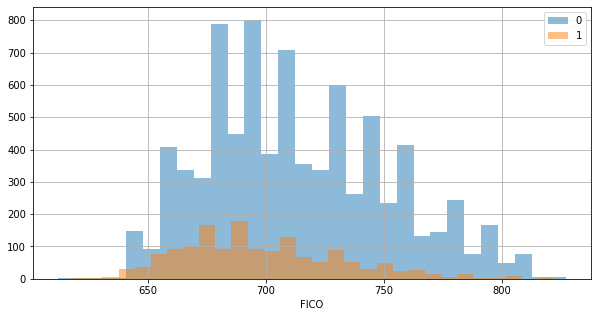

In [14]:
plt.figure(figsize=(10,5))
df[df['not_fully_paid']==0]['fico'].hist(bins=30,alpha=0.5,label='0')
df[df['not_fully_paid']==1]['fico'].hist(bins=30,alpha=0.5,label='1')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

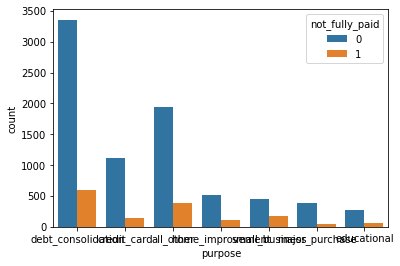

In [15]:
sns.countplot('purpose',data=df,hue='not_fully_paid')

<AxesSubplot:xlabel='purpose', ylabel='count'>

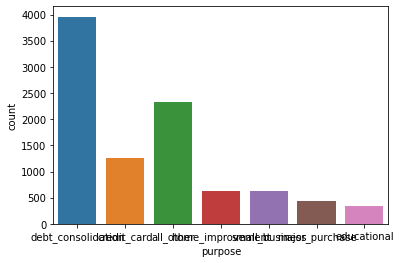

In [16]:
sns.countplot('purpose',data=df)

<AxesSubplot:xlabel='count', ylabel='not_fully_paid'>

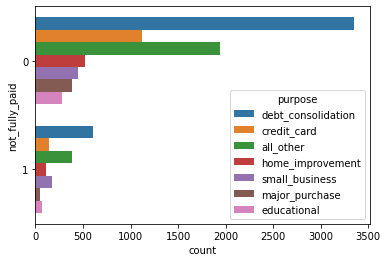

In [17]:
sns.countplot(y="not_fully_paid", hue="purpose", data=df)

<AxesSubplot:xlabel='purpose', ylabel='count'>

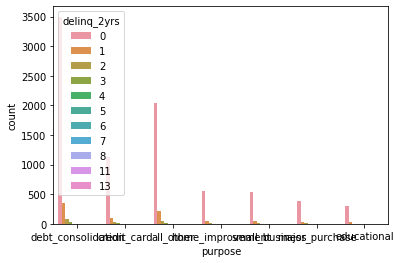

In [18]:
sns.countplot('purpose',data=df,hue='delinq_2yrs')

Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not_fully_paid.

<AxesSubplot:xlabel='purpose', ylabel='count'>

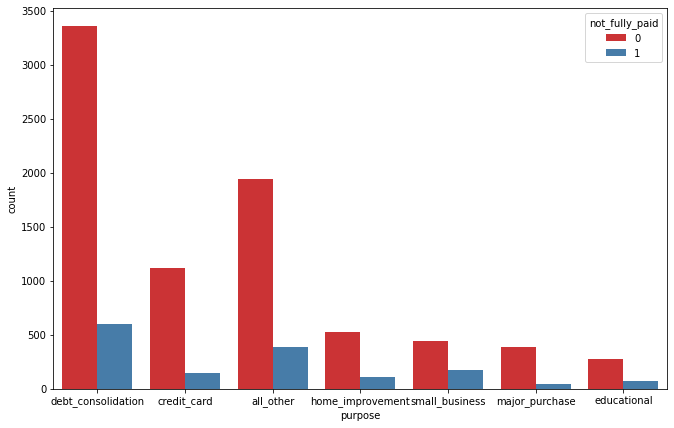

In [19]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not_fully_paid',data=df,palette='Set1')

The trend between FICO score and interest rate. Recreate the following jointplot

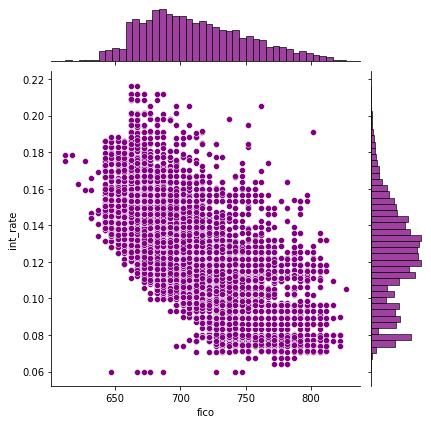

In [20]:
sns.jointplot(x='fico',y='int_rate',data=df,color='purple')

Create the following lmplots to see if the trend differed between not_fully_paid and credit_policy.

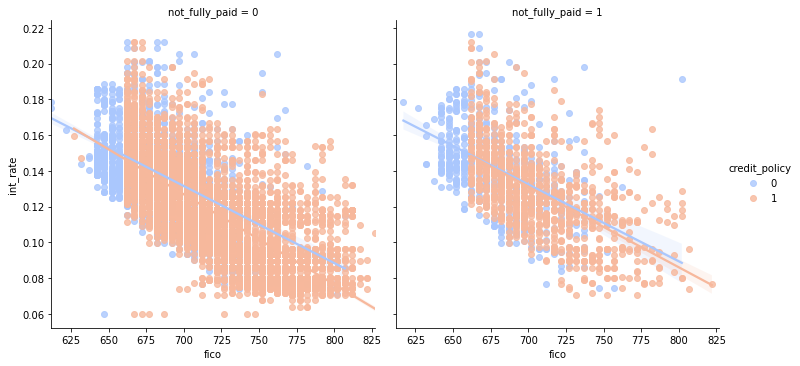

In [21]:
sns.lmplot('fico','int_rate',data=df,col='not_fully_paid',hue='credit_policy',palette='coolwarm')

Plots for various categorical variables

['credit_policy', 'purpose', 'fico', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec']
['int_rate', 'installment', 'log_annual_inc', 'dti', 'days_with_cr_line', 'revol_util']


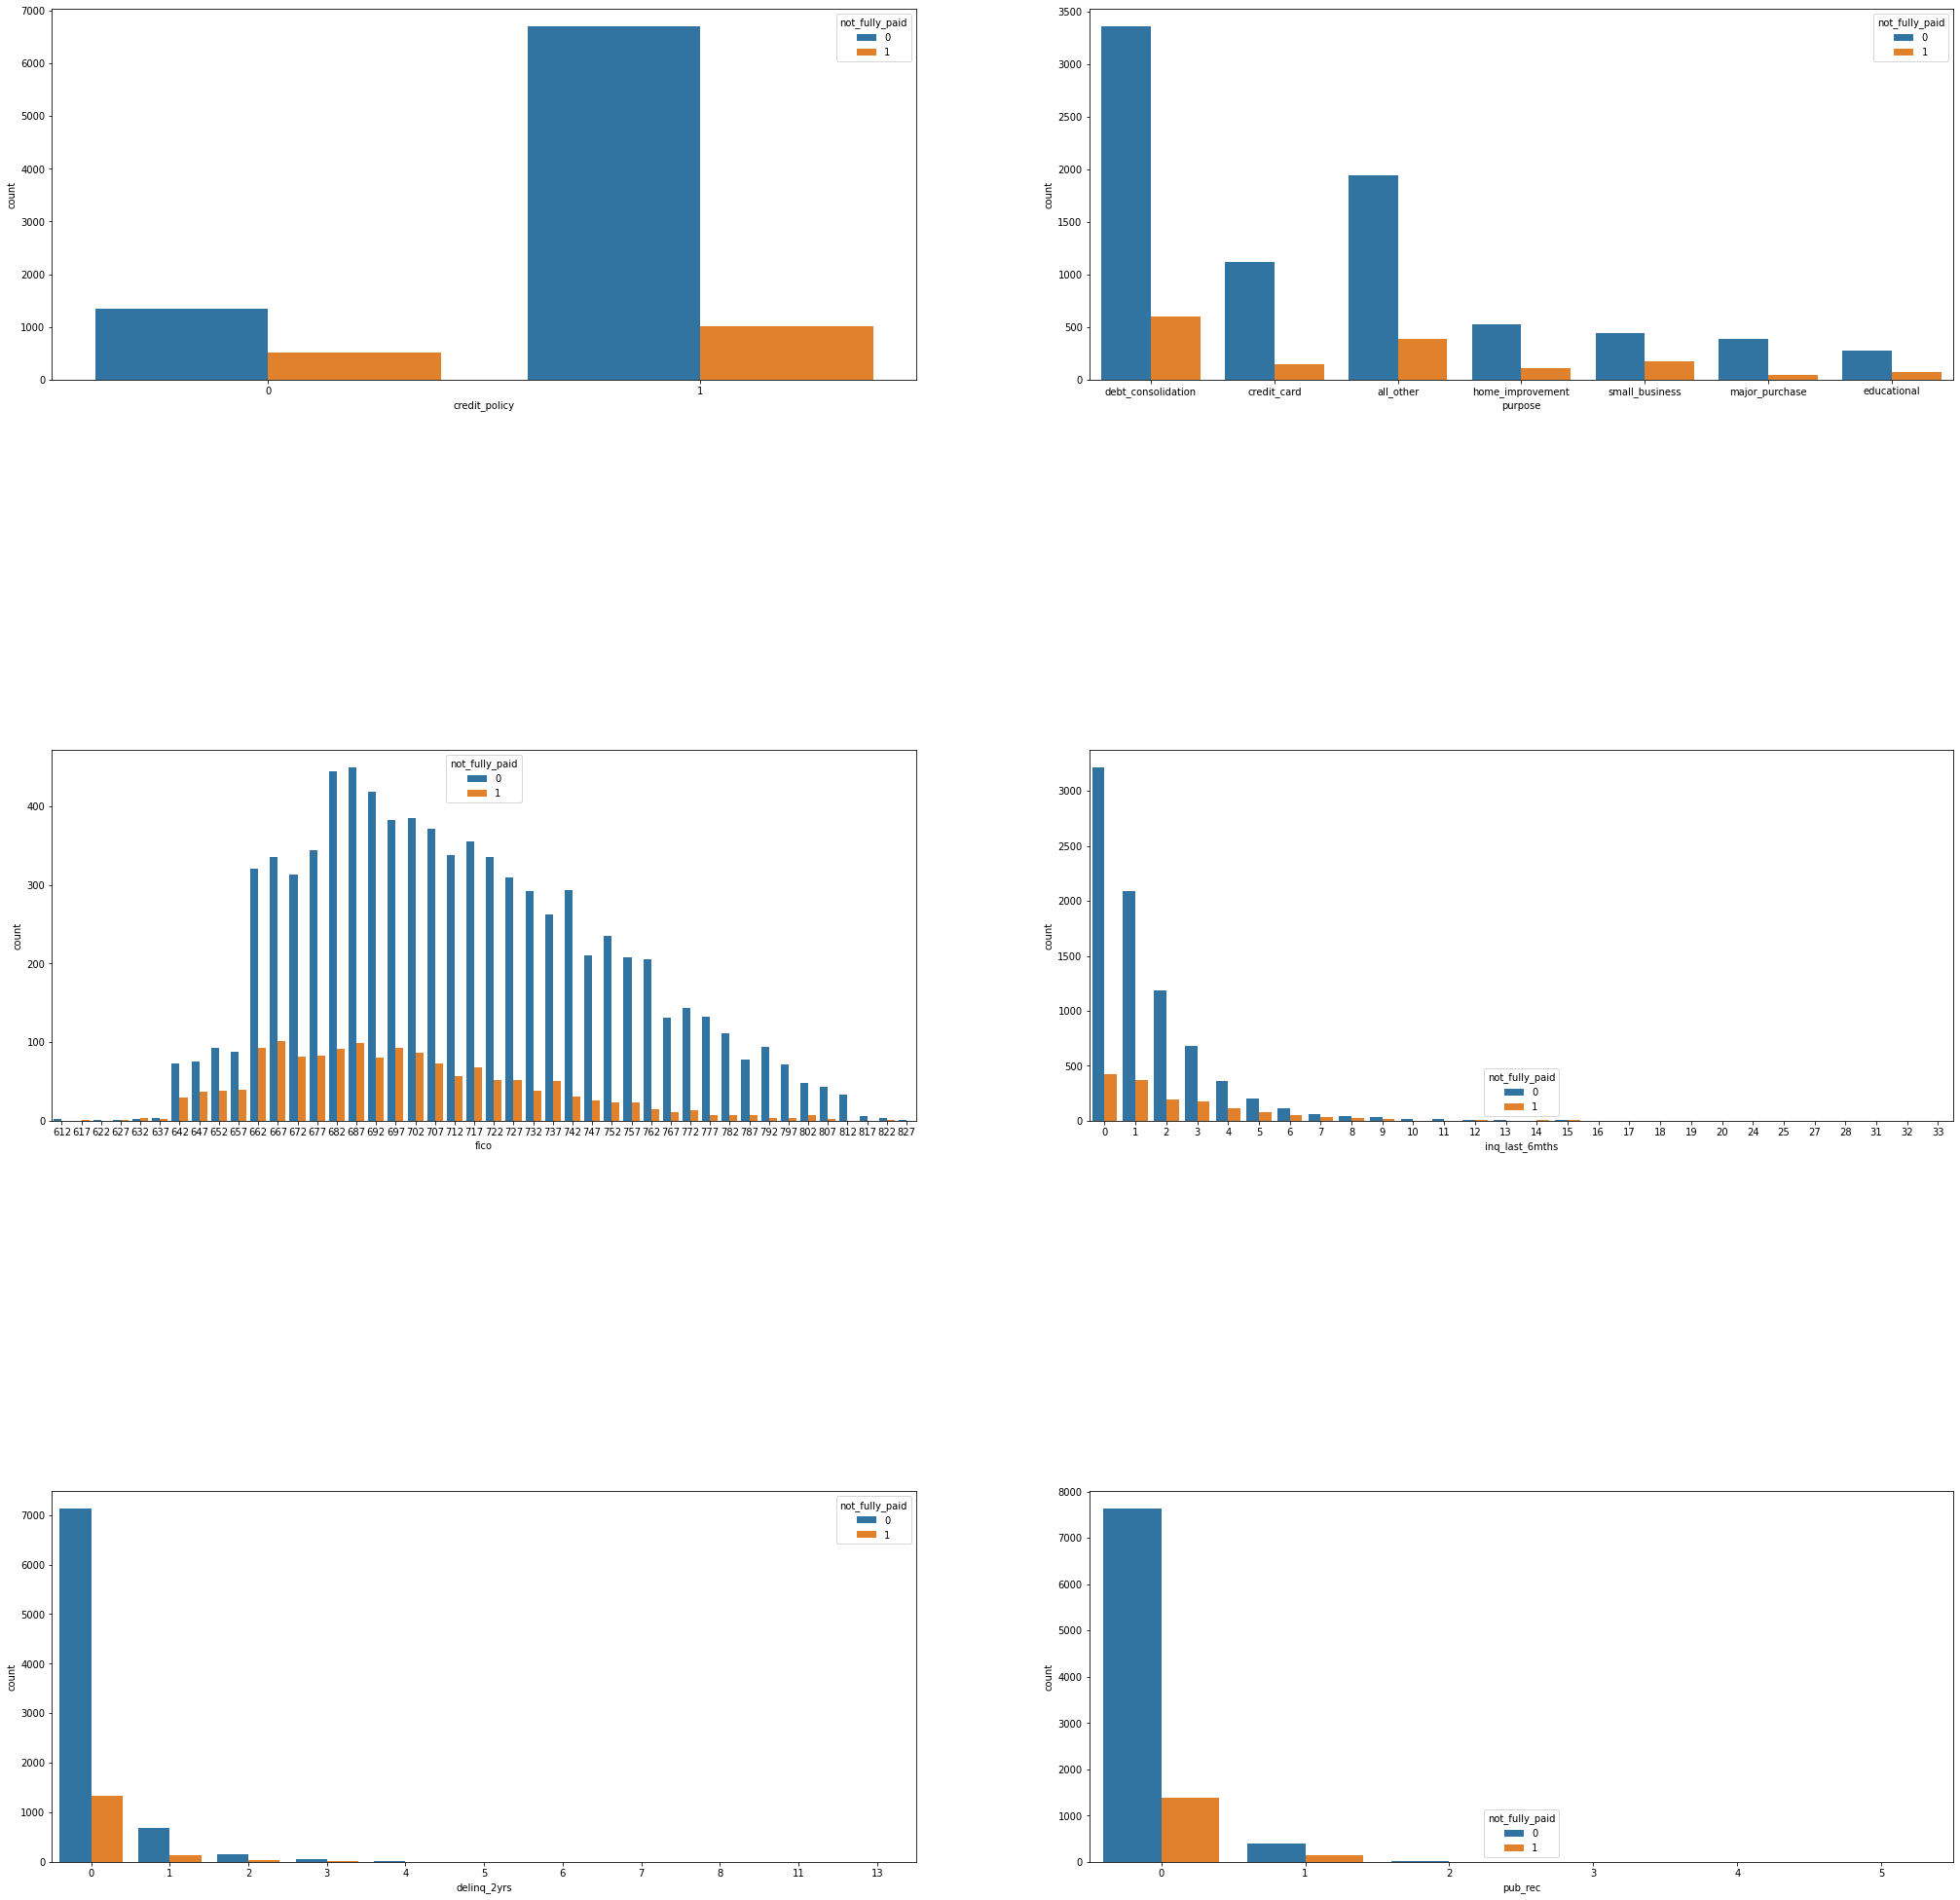

In [34]:
categorical_columns = ['credit_policy', 'purpose', 'fico', 'inq_last_6mths', 'delinq_2yrs','pub_rec']

print(categorical_columns)
numerical_columns = ['int_rate', 'installment', 'log_annual_inc', 'dti', 'days_with_cr_line', 'revol_util']
print(numerical_columns)

fig,axes = plt.subplots(3,2,figsize=(35,35))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='not_fully_paid',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

The Plots above convey the following things for our dataset. The non_full_paid loans are the small portion compared to the other one in the classification for every plot.

          int_rate  installment  log_annual_inc          dti  \
count  9578.000000  9578.000000     9578.000000  9578.000000   
mean      0.122640   319.089413       10.932117    12.606679   
std       0.026847   207.071301        0.614813     6.883970   
min       0.060000    15.670000        7.547502     0.000000   
25%       0.103900   163.770000       10.558414     7.212500   
50%       0.122100   268.950000       10.928884    12.665000   
75%       0.140700   432.762500       11.291293    17.950000   
max       0.216400   940.140000       14.528354    29.960000   

       days_with_cr_line   revol_util  
count        9578.000000  9578.000000  
mean         4560.767197    46.799236  
std          2496.930377    29.014417  
min           178.958333     0.000000  
25%          2820.000000    22.600000  
50%          4139.958333    46.300000  
75%          5730.000000    70.900000  
max         17639.958330   119.000000  


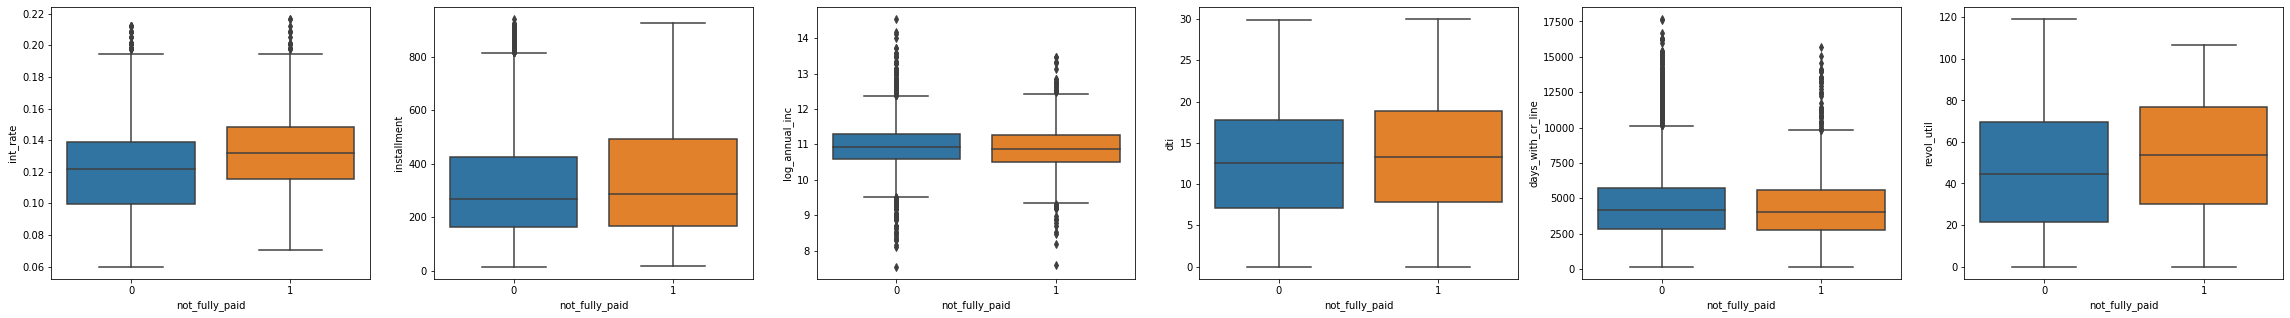

In [37]:
fig,axes = plt.subplots(1,6,figsize=(40,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='not_fully_paid',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For Numercical Columns, there is significant relation to non paid Loan and days_with_cr_line which is the number of days the borrower has had a credit line as well with revol_util which is the borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

<AxesSubplot:>

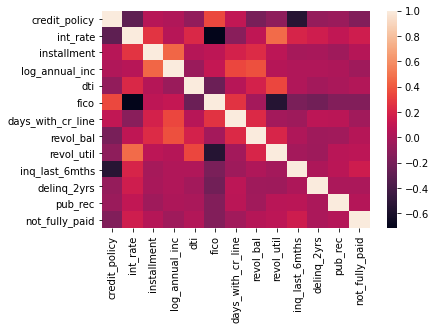

In [38]:
sns.heatmap(df.corr())

Data Processing

In [22]:
df2=pd.get_dummies(df,columns=['purpose'],drop_first=True)
df2

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [23]:
X=df2.drop('not_fully_paid', axis=1)
y=df2['not_fully_paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

DECISION TREE

In [26]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preds1=dt.predict(X_test)

In [27]:
print(classification_report(y_test,preds1))
print(confusion_matrix(y_test,preds1))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2666
           1       0.22      0.25      0.23       495

    accuracy                           0.74      3161
   macro avg       0.54      0.54      0.54      3161
weighted avg       0.76      0.74      0.75      3161

[[2214  452]
 [ 370  125]]


In [28]:
rf=RandomForestClassifier(n_estimators=500,min_samples_leaf=1, min_samples_split=5)
rf.fit(X_train,y_train)
preds2=rf.predict(X_test)

In [29]:
print(classification_report(y_test,preds2))
print(confusion_matrix(y_test,preds2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2666
           1       0.26      0.02      0.03       495

    accuracy                           0.84      3161
   macro avg       0.55      0.50      0.47      3161
weighted avg       0.75      0.84      0.77      3161

[[2640   26]
 [ 486    9]]
